# Import the packages and modules

In [1]:
"""
Reproduction Script for all results presented
"""
import csv
from argparse import ArgumentParser
from copy import deepcopy
import pandas as pd
import torch
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
from agents import SDPAgentFF, SDPAgentRNN, RandomAgent
from gym_vrp.envs import SantaIRPEnv, SantaIRPEnv_RNN

seed = 123
num_nodes_ff = [3, 5, 7, 10, 15, 20,30]
num_nodes_rnn = [3, 5, 7, 10, 15]
batch_size = 128
max_history_length = 10

num_epochs = 501
lr = 1e-3
gamma = 0.99
dropout_rate = 0.5
hidden_dim_ff = 1024
hidden_dim_rnn = 512
num_layers = 2

csv_path = "evaluation_reproduction.csv"


## Train the agent

In [2]:
with open(csv_path, "w+", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Model", "Number of Nodes", "Mean Reward"])

for node in num_nodes_ff:
    print(f"Number of Nodes - {node}")
    env_santa_ff = SantaIRPEnv(
        num_nodes=node, batch_size=batch_size, seed=seed, num_draw=3
    )

    env_santa_ff.enable_video_capturing(
        video_save_path=f"./videos/video_test_santa_ff_{node}_{seed}.mp4"
    )

    env_santa_r = deepcopy(env_santa_ff)

    env_santa_rnn = SantaIRPEnv_RNN(
        num_nodes=node,
        batch_size=batch_size,
        seed=seed,
        num_draw=3,
        max_history_length=max_history_length,
    )
    env_santa_rnn.enable_video_capturing(
        video_save_path=f"./videos/video_test_santa_rnn_{node}_{seed}.mp4"
    )

    print(f"\tEvaluating FF")
    agent_santa_ff = SDPAgentFF(
        node_dim=node,
        hidden_dim=hidden_dim_ff,
        lr=lr,
        gamma=gamma,
        dropout_rate=dropout_rate,
        seed=seed,
        csv_path=f"./train_logs/loss_log_santa_ff_{node}_{seed}.csv",
    )

    # load the model in
    agent_santa_ff.model.load_state_dict(
        torch.load(
            f"./check_points/santa_ff_{node}_{seed}/model_epoch_{num_epochs-1}.pt"
        )
    )
    reward_ff = agent_santa_ff.evaluate(
        env_santa_ff,
    )

    # Close the video recorder
    env_santa_ff.vid.close()

    print(f"\tEvaluating RNN")
    agent_santa_rnn = SDPAgentRNN(
        node_dim=node,
        num_features=7,
        hidden_dim=hidden_dim_rnn,
        lr=lr,
        gamma=gamma,
        dropout_rate=dropout_rate,
        csv_path=f"./train_logs/loss_log_santa_rnn_{node}_{seed}.csv",
        seed=seed,
        num_layers=num_layers,
    )

    if node in num_nodes_rnn:
        # load the model in
        agent_santa_rnn.model.load_state_dict(
            torch.load(
                f"./check_points/santa_rnn_{node}_{seed}/model_epoch_{num_epochs-1}.pt"
            )
        )
        reward_rnn = agent_santa_rnn.evaluate(
            env_santa_rnn,
        )

        env_santa_rnn.vid.close()
    else:
        reward_rnn = np.nan

    random_agent = RandomAgent(seed=seed)
    reward_r = random_agent.evaluate(env_santa_r)

    with open(csv_path, "a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([f"FF-Agent", node, reward_ff])
        writer.writerow([f"RNN-Agent", node, reward_rnn])
        writer.writerow([f"Random-Agent", node, reward_r])


Number of Nodes - 3
	Evaluating FF
Moviepy - Building video ./videos/video_test_santa_ff_3_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_3_123.mp4



/Users/finlayduff/Documents/BATH MSc/Reinforcement Learning/VRP-GYM-extension/agents/rnn_sdp_agent.py:59: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  torch.tensor(seq, dtype=torch.float, device=self.device).view(


Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_3_123.mp4
	Evaluating RNN
Moviepy - Building video ./videos/video_test_santa_rnn_3_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_rnn_3_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_rnn_3_123.mp4


Number of Nodes - 5
	Evaluating FF
Moviepy - Building video ./videos/video_test_santa_ff_3_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_3_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_3_123.mp4


Moviepy - Building video ./videos/video_test_santa_ff_5_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_5_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_5_123.mp4
	Evaluating RNN
Moviepy - Building video ./videos/video_test_santa_rnn_5_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_rnn_5_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_rnn_5_123.mp4
Number of Nodes - 7
	Evaluating FF
Moviepy - Building video ./videos/video_test_santa_ff_5_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_5_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_5_123.mp4
Moviepy - Building video ./videos/video_test_santa_ff_7_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_7_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_7_123.mp4
	Evaluating RNN
Moviepy - Building video ./videos/video_test_santa_rnn_7_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_rnn_7_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_rnn_7_123.mp4
Number of Nodes - 10
	Evaluating FF
Moviepy - Building video ./videos/video_test_santa_ff_7_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_7_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_7_123.mp4
Moviepy - Building video ./videos/video_test_santa_ff_10_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_10_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_10_123.mp4
	Evaluating RNN
Moviepy - Building video ./videos/video_test_santa_rnn_10_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_rnn_10_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_rnn_10_123.mp4
Number of Nodes - 15
	Evaluating FF
Moviepy - Building video ./videos/video_test_santa_ff_10_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_10_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_10_123.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123.mp4
	Evaluating RNN
Moviepy - Building video ./videos/video_test_santa_rnn_15_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_rnn_15_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_rnn_15_123.mp4
Number of Nodes - 20
Moviepy - Building video ./videos/video_test_santa_ff_15_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123.mp4
	Evaluating FF
Moviepy - Building video ./videos/video_test_santa_ff_20_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_20_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_20_123.mp4
	Evaluating RNN
Number of Nodes - 30
	Evaluating FF
Moviepy - Building video ./videos/video_test_santa_ff_20_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_20_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_20_123.mp4
Moviepy - Building video ./videos/video_test_santa_ff_30_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_30_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_30_123.mp4
	Evaluating RNN


## Visualise the actions of the agent in the environments

In [3]:
df = pd.read_csv('evaluation_reproduction.csv')

In [5]:
df

,Model,Number of Nodes,Mean Reward,Percentage Improvement
0,FF-Agent,3,-1.460727,5.799510
1,RNN-Agent,3,-1.550810,-0.009853
2,Random-Agent,3,-1.550658,0.000000
3,FF-Agent,5,-2.626484,17.312657
4,RNN-Agent,5,-2.644109,16.757799
5,Random-Agent,5,-3.176404,0.000000
6,FF-Agent,7,-4.628214,7.360798
7,RNN-Agent,7,-5.773451,-15.562489
8,Random-Agent,7,-4.995956,0.000000
9,FF-Agent,10,-7.779705,4.173475


<Figure size 640x480 with 0 Axes>

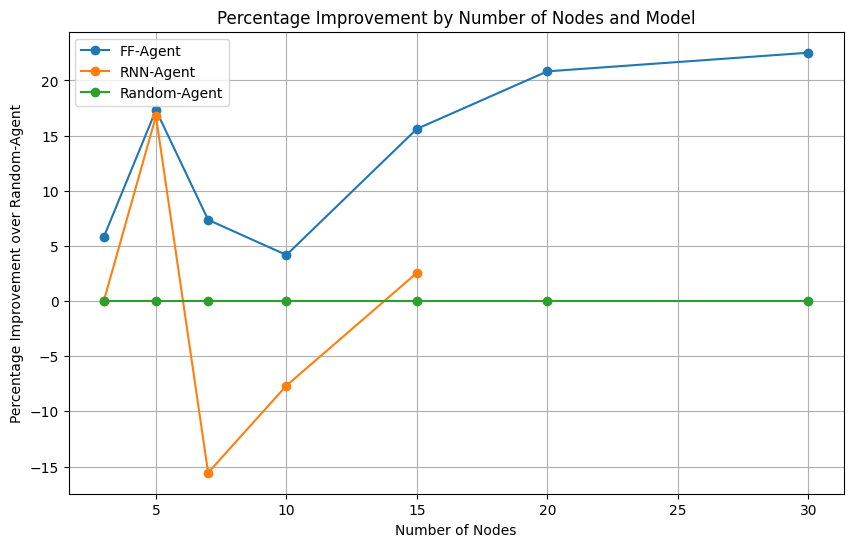

In [4]:
# Isolate Random-Agent's mean rewards
random_agent_rewards = df[df['Model'] == 'Random-Agent'].set_index('Number of Nodes')['Mean Reward']

# Calculate percentage improvement over Random-Agent
df['Percentage Improvement'] = df.apply(lambda row: ((row['Mean Reward'] - random_agent_rewards.loc[row['Number of Nodes']]) / abs(random_agent_rewards.loc[row['Number of Nodes']])) * 100, axis=1)

# Plotting
plt.figure(figsize=(10, 6))

for model in df['Model'].unique():
    subset = df[df['Model'] == model]
    plt.plot(subset['Number of Nodes'], subset['Percentage Improvement'], marker='o', label=model)

plt.xlabel('Number of Nodes')
plt.ylabel('Percentage Improvement over Random-Agent')
plt.title('Percentage Improvement by Number of Nodes and Model')
plt.legend()
plt.grid(True)
plt.show()

## Learning Plots

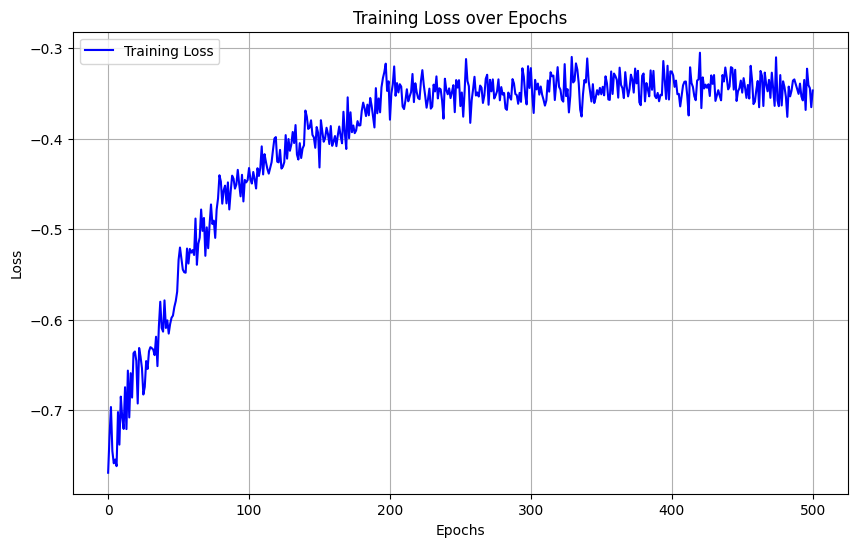

In [12]:
node = 30

# Load the CSV file
csv_path = f"./train_logs/loss_log_santa_ff_{node}_{seed}.csv"
data = pd.read_csv(csv_path)

# Extract the 'Epoch' and 'Loss' columns
epochs = data['Epoch']
loss = data['Loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


# Performance

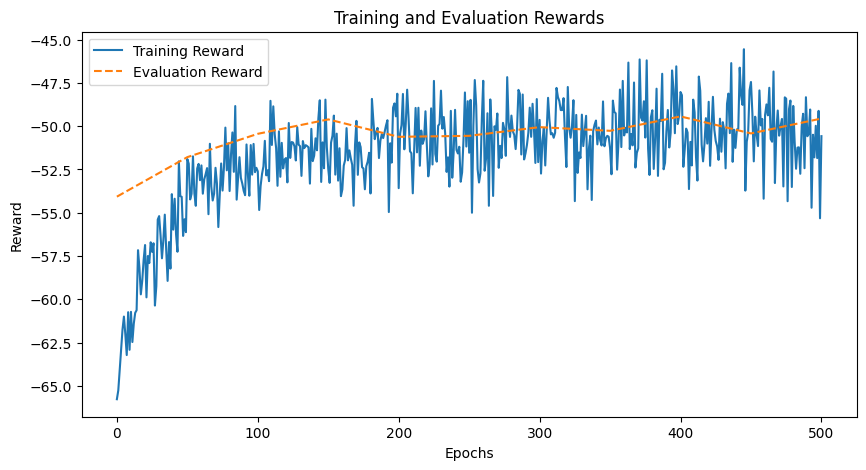

In [13]:
training_rewards = data['Train Reward']
eval_rewards = data['Eval Reward'].dropna()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(training_rewards, label='Training Reward')
plt.plot(eval_rewards, label='Evaluation Reward', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards')
plt.legend()
plt.show()

In [11]:
seed = 123
node = 15

for num in range(1,502,50):
    env_santa_ff = SantaIRPEnv(
        num_nodes=node, batch_size=batch_size, seed=seed, num_draw=3
    )

    env_santa_ff.enable_video_capturing(
        video_save_path=f"./videos/video_test_santa_ff_{node}_{seed}_{num}.mp4"
    )

    agent_santa_ff = SDPAgentFF(
        node_dim=node,
        hidden_dim=hidden_dim_ff,
        lr=lr,
        gamma=gamma,
        dropout_rate=dropout_rate,
        seed=seed,
        csv_path=f"./train_logs/loss_log_santa_ff_{node}_{seed}.csv",
    )

    # load the model in
    agent_santa_ff.model.load_state_dict(
        torch.load(
            f"./check_points/santa_ff_{node}_{seed}/model_epoch_{num-1}.pt"
        )
    )
    reward_ff = agent_santa_ff.evaluate(
        env_santa_ff,
    )

    # Close the video recorder
    env_santa_ff.vid.close()

Moviepy - Building video ./videos/video_test_santa_ff_20_123_101.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_20_123_101.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_20_123_101.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_1.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_1.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_1.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_51.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_51.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_51.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_101.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_101.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_101.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_151.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_151.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_151.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_201.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_201.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_201.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_251.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_251.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_251.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_301.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_301.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_301.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_351.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_351.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_351.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_401.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_401.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_401.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_451.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_451.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_451.mp4
Moviepy - Building video ./videos/video_test_santa_ff_15_123_501.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_15_123_501.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_15_123_501.mp4
